In [1]:
%autosave 0

Autosave disabled


Simulation lesson! Let's simulate probability problems using numpy!

We set a random seed because all numbers generated by a computer are pseudo-random.  
The notebook will be reproducible if we keep the seed consistent throughout.  
This will be an important concept when we get to splitting data for data science projects.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

np.random.seed(42)

There are many ways to generate random numbers with numpy!

- .choice() chooses from a list of possible values
- .integers() gives integers from a low to high range
- .random() gives random floats from 0 to 1
- .normal() allows us to define a normal distribution and sample from it

Our syntax will differ slightly from the curriculum. [Let's see](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) why.

In [3]:
rng = np.random.default_rng(seed = 42)

In [4]:
rng.choice([1,3,5,7,9], (10, 2))  #hey python, this is tuple showing 10 rows and 2 column

array([[1, 7],
       [7, 5],
       [5, 9],
       [1, 7],
       [3, 1],
       [5, 9],
       [7, 7],
       [7, 7],
       [5, 1],
       [9, 5]])

In [5]:
rng.integers(1, 11, (10,2)) #a range with tuple. return 10 rows, 2 columns between 1 to 11

array([[ 6,  4],
       [ 2, 10],
       [ 8,  7],
       [ 5,  9],
       [ 6,  5],
       [ 5,  3],
       [ 1,  6],
       [ 9,  1],
       [ 9,  9],
       [ 3,  7]])

In [6]:
rng.random((10,2))

array([[0.75808774, 0.35452597],
       [0.97069802, 0.89312112],
       [0.7783835 , 0.19463871],
       [0.466721  , 0.04380377],
       [0.15428949, 0.68304895],
       [0.74476216, 0.96750973],
       [0.32582536, 0.37045971],
       [0.46955581, 0.18947136],
       [0.12992151, 0.47570493],
       [0.22690935, 0.66981399]])

In [7]:
rng.normal(0,1, (10,2))  #this is where you define the mean, std, size of the result

array([[ 0.74325417,  0.54315427],
       [-0.66550971,  0.23216132],
       [ 0.11668581,  0.2186886 ],
       [ 0.87142878,  0.22359555],
       [ 0.67891356,  0.06757907],
       [ 0.2891194 ,  0.63128823],
       [-1.45715582, -0.31967122],
       [-0.47037265, -0.63887785],
       [-0.27514225,  1.49494131],
       [-0.86583112,  0.96827835]])

Let's start simulating some scenarios.

let's simulate some coin flips, determine the likelihood of getting 3 out of 3 heads!

In [8]:
#0 is tails, 1 is head
flips = rng.choice([0,1], (1_000, 3))   #second argument define the shape of tuple, 1000 times, 3 columns
flips[:5]

array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

Expecting to see a 0.125 probability of this happening

In [9]:
flips_sum = flips.sum(axis=1)
flips_sum[:5]
#this outcome matches the last code but this shows result rather than showing you the vis

array([2, 3, 2, 2, 1])

In [12]:
(flips_sum == 3).sum()     #check for each instance of 3 heads in a row

129

In [14]:
wins = (flips_sum ==3).sum()
wins

129

In [16]:
wins / len(flips_sum) #result is very close to expected result

0.129

On any given class day, there is a 10% chance that Adam forgets to take attendance
Assuming all weeks have 5 class days, what is the probability he forgets AT LEAST once in a week?

In [17]:
weeks =rng.random((1_000, 5))
weeks[:5]

array([[0.88977947, 0.90860825, 0.79145149, 0.46093139, 0.081154  ],
       [0.01580556, 0.47720063, 0.49431453, 0.40736239, 0.56816735],
       [0.5521627 , 0.83661304, 0.1086571 , 0.22517767, 0.79300498],
       [0.84783687, 0.99482421, 0.87291202, 0.88989901, 0.31434794],
       [0.40166163, 0.2680851 , 0.6062994 , 0.93880535, 0.34464089]])

In [18]:
weeks <= 0.1 #using numpy to calculate this statement of inequality. True mean forgot, False mean remember

array([[False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False]])

In [22]:
# to see if he forget at least once ina week
did_forget= (weeks <= 0.1).sum(axis =1)
did_forget[:5]

array([1, 1, 0, 0, 0])

In [24]:
(did_forget != 0).sum()

409

In [25]:
total_forgot = (did_forget !=0).sum()
total_forgot

409

In [26]:
total_forgot/len(forget)

NameError: name 'forget' is not defined

(array([591.,   0.,   0., 321.,   0.,   0.,  81.,   0.,   0.,   7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

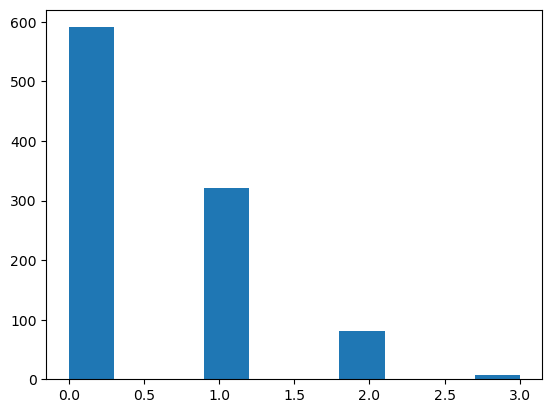

In [28]:
plt.hist(did_forget)

Web dev students, on average, complete 5 projects on average, with a standard deviation of 2. 
Data science students, on average, complete 8 projects with a standard deviation of 1
What's the likelihood that a web dev student completes as many OR MORE projects than a data science student?

In [30]:
wd_projects = rng.normal(5,2, 1_000)    
ds_projects = rng.normal(8,1, 1_000)

In [32]:
num_higher = (wd_projects >= ds_projects).sum()
num_higher

89

In [33]:
num_higher/len(ds_projects)

0.089